## FIFA 2019 PLAYERS' WAGES

The goal of this project is to use the players’ attributes to predict his annual wage in dollars.

Some Guidance:
• The competition will be opened January 6th 2020 and it will will be closed one week 10 of the winter quarter.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [19]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


전처리, null 값 처리하기

Position_Class 생성으로 칼럼 수 줄이기
Nan으로 되어있는 48개 행 삭제
money -> 사용자 함수 적용 및 변환

In [20]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [21]:
df.insert(9,'Position_Class',
            df.apply(lambda x: 
            'Forward' if x['Position'] in ['LS','ST','RS','LW','LF','CF','RF','RW']
            else 'Midfielder' if x['Position'] in ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']
            else 'Defender' if x['Position'] in  ['LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
            else 'GoalKeeper', axis =1))

In [22]:
df.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'], axis=1, inplace=True)

13236~13283 행 삭제

In [23]:
nan_data=df.iloc[13236:13284,:]
nan_data.index
df.drop(nan_data.index,inplace = True)

사용자 함수(money)

In [24]:
def exchange(value):
    out = value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000
    elif 'K' in out:
        out = float(out.replace('K',''))*1000
    return float(out)

In [26]:
# df.Value= df.Value.astype('str')
# df.Wage = df.Wage.astype('str')
df['Release Clause'] = df['Release Clause'].astype('str')

In [ ]:
사용자 함수 쓰는 과정에 자꾸 오류남.......... ㅠㅠ

In [27]:
# df.Value = df.Value.apply(lambda x: exchange(x))
# df.Wage = df.Wage.apply(lambda x: exchange(x))
df['Release Clause'] = df['Release Clause'].apply(lambda x: exchange(x))

In [256]:
df.Wage = df.Wage.astype(float)
df.Value = df.Value.astype(float)
# df.Release_Clause = df.Release_Clause(float)

In [13]:
df1 = df[['Name', 'Age', 'Nationality',
       'Overall', 'Potential', 'Club', 'Value','Wage', 'Special',
       'Preferred Foot', 'International Reputation','Position_Class', 'Weak Foot']]
df1.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Position_Class,Weak Foot
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,Forward,4.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,Forward,4.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,Forward,5.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,GoalKeeper,3.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,Midfielder,5.0


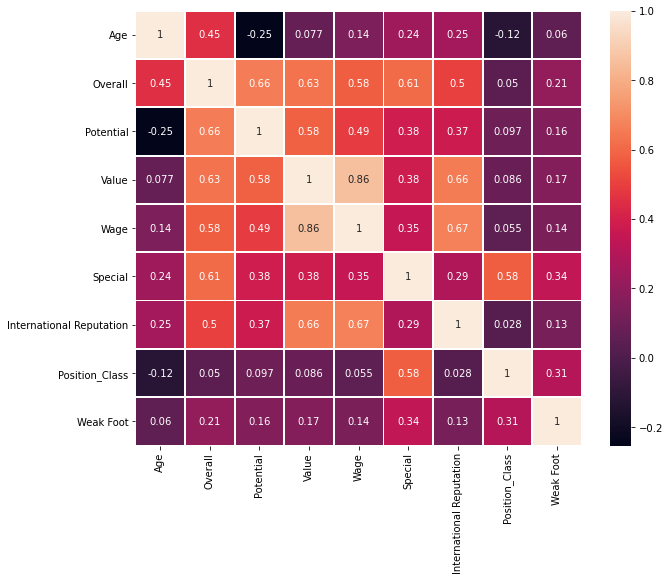

In [436]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),linewidths=.8, annot=True) # int, float만 볼 수 있음

In [28]:
# df1에서 필요없는 칼럼 선삭제
df.drop(['Unnamed: 0','ID','Photo', 'Flag', 'Club Logo'], axis = 1, inplace = True)
# df1.drop(['Unnamed: 0','ID','Photo', 'Flag', 'Club Logo'], axis = 1, inplace = True)

In [16]:
df1.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Position_Class,Weak Foot
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,Forward,4.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,Forward,4.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,Forward,5.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,GoalKeeper,3.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,Midfielder,5.0


In [31]:
df.isnull().sum()

Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Position_Class                  0
Club                          241
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                       0
Real Face                       0
Position                       12
Jersey Number                  12
Joined                       1505
Loaned From                 16895
Contract Valid Until          241
Height                          0
Weight                          0
Crossing                        0
Finishing                       0
HeadingAccuracy                 0
ShortPassing                    0
Volleys                         0
Dribbling     

In [17]:
df1.Club.fillna('non_club', inplace =True)

In [91]:
df.Club.fillna('non_club', inplace = True)

In [37]:
df.query("Club=='non_club'")[['Club','Wage','Age','Name', 'Value','Position', 'Jersey Number','International Reputation','Release Clause','Joined',
                              'Loaned From','Contract Valid Until','Release Clause']]
# non_club 삭제해도 무방해보임.-> 삭제

,Club,Wage,Age,Name,Value,Position,Jersey Number,International Reputation,Release Clause,Joined,Loaned From,Contract Valid Until,Release Clause
452,non_club,0.0,24,L. Paredes,0.0,CM,5.0,2.0,NaN,NaN,NaN,NaN,NaN
538,non_club,0.0,33,A. Granqvist,0.0,LCB,4.0,2.0,NaN,NaN,NaN,NaN,NaN
568,non_club,0.0,26,A. Lunev,0.0,GK,12.0,1.0,NaN,NaN,NaN,NaN,NaN
677,non_club,0.0,29,I. Smolnikov,0.0,RB,2.0,2.0,NaN,NaN,NaN,NaN,NaN
874,non_club,0.0,29,A. Dzyuba,0.0,ST,22.0,2.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,non_club,0.0,21,V. Kaith,0.0,GK,1.0,1.0,NaN,NaN,NaN,NaN,NaN
17215,non_club,0.0,26,K. Taimi,0.0,RB,3.0,1.0,NaN,NaN,NaN,NaN,NaN
17339,non_club,0.0,23,S. Passi,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
17436,non_club,0.0,20,D. Lalhlimpuia,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


Nationality and 오타 처리

In [32]:
df.Nationality.replace('Bosnia Herzegovina', 'Bosnia', inplace = True)
df.Nationality.replace('Central African Rep.','Central African Rep', inplace = True )

# 축구연맹 별 특이점 'Australia'는 아시아축구연맹 중 아세안 축구연맹이다. 오세아니아 연맹은 탈퇴했다

In [21]:
df1.insert(1,'Classified',
            df1.apply(lambda x: 
            'America' if x['Nationality'] in ['Mexico', 'Venezuela','Honduras','Canada','Ecuador','Paraguay','Argentina',
            'Uruguay','Peru','Chile','Colombia','Brazil','Bolivia','Costa Rica','Antigua & Barbuda',
            'El Salvador','Grenada','United States','Suriname','Bermuda','Curacao','Guatemala',
            'Cuba','Panama','Dominican Republic','Barbados','Haiti','Nicaragua','Belize','St Lucia','Trinidad & Tobago',
            'St Kitts Nevis','Guyana','Puerto Rico','Guam','Jamaica']
            else 'Africa' if x['Nationality'] in ['Ghana','Gabon','Gambia','Guinea','Guinea Bissau'
             ,'Namibia','Nigeria','South Sudan','South Africa','Niger','Liberia','Rwanda',
             'Libya','Madagascar','Malawi','Mali','Morocco','Mauritius','Mauritania','Mozambique','Benin'
             ,'Botswana','Burkina Faso','Burundi','São Tomé & Príncipe','Senegal','Sudan','Sierra Leone',
             'Algeria','Angola','Eritrea','Ethiopia','Uganda','Egypt','Zambia','Equatorial Guinea',
             'Central African Rep','Zimbabwe','Chad','Cameroon','Cape Verde','Kenya','Comoros','Congo','DR Congo',
              'Tanzania','Togo','Tunisia','Ivory Coast']
            else 'Europe' if x['Nationality'] in  ['Portugal','Spain','Belgium','Croatia','Slovenia','Poland','Germany',
           'France','England','Italy','Denmark','Wales','Slovakia','Netherlands','Bosnia','Herzegovina','Serbia','Austria',
           'Greece','Sweden','Finland','Montenegro','Armenia','Switzerland','Norway','Czech Republic','Scotland','Russia',
           'Ukraine','Iceland','Albania','Turkey','Israel','Hungary','Republic of Ireland','Romania','Estonia','FYR Macedonia',
           'Bulgaria','Kosovo','Georgia','Belarus','Northern Ireland','Cyprus','Lithuania','Luxembourg',
           'Liechtenstein','Latvia','Kazakhstan','Montserrat','Azerbaijan','Faroe Islands','Andorra','Malta','Moldova']
            else 'Asia' if x['Nationality'] in  ['Korea Republic','Japan','Iran','United Arab Emirates',
            'China PR','Uzbekistan','Saudi Arabia','Philippines' ,'Oman','Iraq',
            'Korea DPR','Kuwait','Thailand','Syria',
            'India','Lebanon','Palestine','Jordan',
            'Qatar','Afghanistan', 'Hong Kong','Indonesia','Australia']
            else 'Oceania', axis =1))

In [33]:
df.insert(1,'Classified',
            df.apply(lambda x: 
            'America' if x['Nationality'] in ['Mexico', 'Venezuela','Honduras','Canada','Ecuador','Paraguay','Argentina',
            'Uruguay','Peru','Chile','Colombia','Brazil','Bolivia','Costa Rica','Antigua & Barbuda',
            'El Salvador','Grenada','United States','Suriname','Bermuda','Curacao','Guatemala',
            'Cuba','Panama','Dominican Republic','Barbados','Haiti','Nicaragua','Belize','St Lucia','Trinidad & Tobago',
            'St Kitts Nevis','Guyana','Puerto Rico','Guam','Jamaica']
            else 'Africa' if x['Nationality'] in ['Ghana','Gabon','Gambia','Guinea','Guinea Bissau'
             ,'Namibia','Nigeria','South Sudan','South Africa','Niger','Liberia','Rwanda',
             'Libya','Madagascar','Malawi','Mali','Morocco','Mauritius','Mauritania','Mozambique','Benin'
             ,'Botswana','Burkina Faso','Burundi','São Tomé & Príncipe','Senegal','Sudan','Sierra Leone',
             'Algeria','Angola','Eritrea','Ethiopia','Uganda','Egypt','Zambia','Equatorial Guinea',
             'Central African Rep','Zimbabwe','Chad','Cameroon','Cape Verde','Kenya','Comoros','Congo','DR Congo',
              'Tanzania','Togo','Tunisia','Ivory Coast']
            else 'Europe' if x['Nationality'] in  ['Portugal','Spain','Belgium','Croatia','Slovenia','Poland','Germany',
           'France','England','Italy','Denmark','Wales','Slovakia','Netherlands','Bosnia','Herzegovina','Serbia','Austria',
           'Greece','Sweden','Finland','Montenegro','Armenia','Switzerland','Norway','Czech Republic','Scotland','Russia',
           'Ukraine','Iceland','Albania','Turkey','Israel','Hungary','Republic of Ireland','Romania','Estonia','FYR Macedonia',
           'Bulgaria','Kosovo','Georgia','Belarus','Northern Ireland','Cyprus','Lithuania','Luxembourg',
           'Liechtenstein','Latvia','Kazakhstan','Montserrat','Azerbaijan','Faroe Islands','Andorra','Malta','Moldova']
            else 'Asia' if x['Nationality'] in  ['Korea Republic','Japan','Iran','United Arab Emirates',
            'China PR','Uzbekistan','Saudi Arabia','Philippines' ,'Oman','Iraq',
            'Korea DPR','Kuwait','Thailand','Syria',
            'India','Lebanon','Palestine','Jordan',
            'Qatar','Afghanistan', 'Hong Kong','Indonesia','Australia']
            else 'Oceania', axis =1))

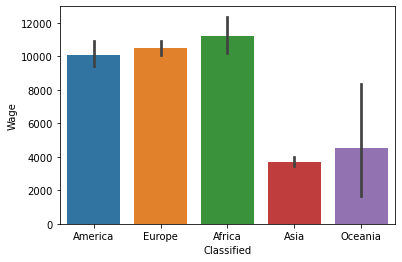

In [23]:
sns.barplot(x = 'Classified', y = 'Wage', data=df)

In [24]:
df1.Classified.replace({'America':0, 'Africa':1,'Europe':2,'Asia':3,'Oceania':4},inplace= True) #상관관계가 높지 않아서 뺌

In [34]:
df.Classified.replace({'America':0, 'Africa':1,'Europe':2,'Asia':3,'Oceania':4},inplace= True) 

In [25]:
df1.head()

,Name,Classified,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Position_Class,Weak Foot
0,L. Messi,0,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,Forward,4.0
1,Cristiano Ronaldo,2,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,Forward,4.0
2,Neymar Jr,0,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,Forward,5.0
3,De Gea,2,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,GoalKeeper,3.0
4,K. De Bruyne,2,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,Midfielder,5.0


Preferred Foot

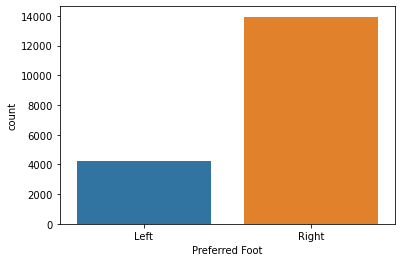

In [26]:
sns.countplot(df1['Preferred Foot']) #상관관계 낮음

In [27]:
df1['Preferred Foot'].replace({'Right':0, 'Left':1},inplace= True)

In [56]:
df['Preferred Foot'].replace({'Right':0, 'Left':1},inplace= True)

Club

In [93]:
non_club_s=df[df.Club =='non_club'].index
df.drop(non_club_s,inplace = True)        

In [ ]:
non_club_s=df[df1.Club =='non_club'].index
df1.drop(non_club_s,inplace = True)        

In [41]:
group = df.groupby(['Club'])[['Wage']]
cmed= group.median().sort_values(by=['Wage'], ascending = False)

In [31]:
cmed.describe()

,Wage
count,652.000000
mean,8899.539877
std,15981.179881
min,0.000000
25%,2000.000000
50%,3000.000000
75%,9000.000000
max,125000.000000


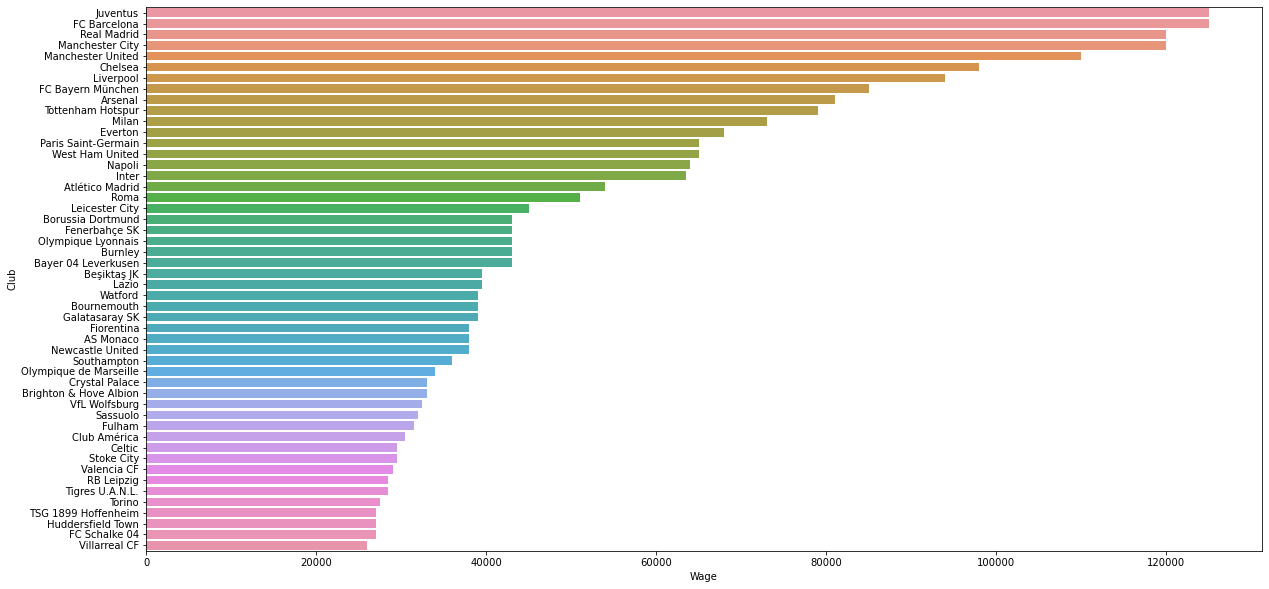

In [32]:
group = df1.groupby('Club')['Wage'].median().reset_index().sort_values('Wage', ascending = False).head(50)
plt.figure(figsize = (20,10))
sns.barplot(x = 'Wage', y = 'Club', data = group)

In [42]:
club1=list(cmed.query('Wage>=100000').index)
club1

['FC Barcelona',
 'Juventus',
 'Manchester City',
 'Real Madrid',
 'Manchester United']

In [43]:
club2=list(cmed.query('Wage>=60000 & Wage<100000').index)
club2

['Chelsea',
 'Liverpool',
 'FC Bayern München',
 'Arsenal',
 'Tottenham Hotspur',
 'Milan',
 'Everton',
 'West Ham United',
 'Paris Saint-Germain',
 'Napoli',
 'Inter']

In [98]:
club3=list(cmed.query('Wage>=20000 & Wage <60000').index)
club4=list(cmed.query('Wage<20000').index)

In [380]:
# df1.drop('Club_Cat',axis= 1, inplace= True)

In [ ]:
df1.insert(6,'Club_Cat',
            df1.apply(lambda x: 
            3 if x['Club'] in club1
            else 2 if x['Club'] in club2
            else 1 if x['Club'] in  club3
            else 0, axis =1))

In [111]:
df.insert(6,'Club_Cat',
            df1.apply(lambda x: 
            3 if x['Club'] in club1
            else 2 if x['Club'] in club2
            else 1 if x['Club'] in club3
            else 0, axis =1))

In [112]:
df.Club_Cat.unique()

array([3, 2, 1, 0], dtype=int64)

Age

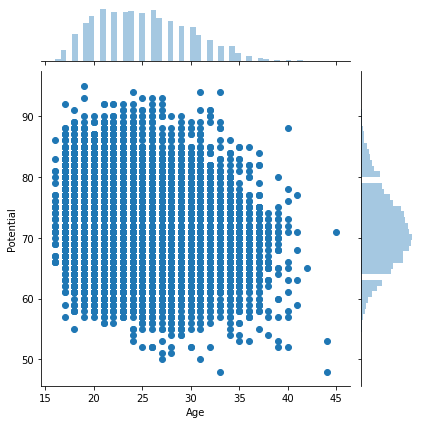

In [38]:
sns.jointplot(x=df1['Age'],y=df1['Potential'])

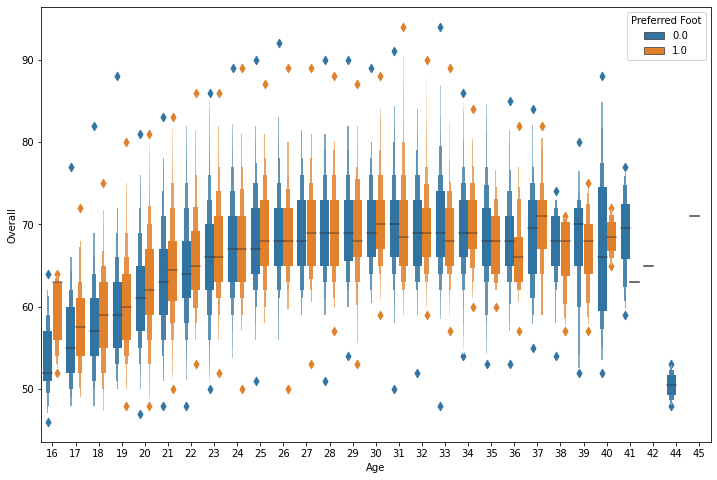

In [39]:
plt.figure(figsize = (12,8))
sns.boxenplot(df1['Age'], df1['Overall'], hue = df1['Preferred Foot'])

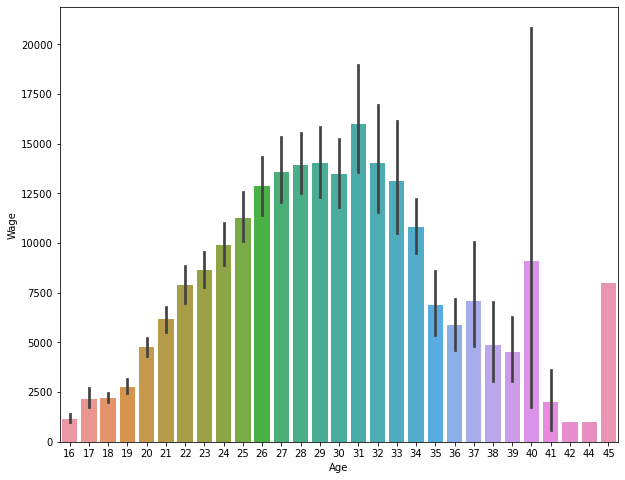

In [61]:
plt.figure(figsize=(10,8))
sns.barplot(x='Age', y = 'Wage', data=df1)

In [46]:
def Age_L2(x):
    if x <20 : return '1'
    elif (20<= x <=22): return '2'
    elif (23<= x <=24): return '3'
    elif (25<= x <= 26): return '4'
    elif (27<= x <= 29): return '5'
    elif (30<= x <=31): return '6'
    elif (32<= x <=33): return '7'
    elif (34 ==x): return '8'
    elif (35 <= x <= 38): return '9'
    elif (39 ==x): return '10'
    elif (40 <= x <= 45): return '11'
df1['Age_L2'] = df1.Age.apply(Age_L2) 

In [47]:
df1[df1.Age_L2.isnull()]

,Name,Classified,Age,Nationality,Overall,Potential,Club_Cat,Position_Class,Club,Value,...,Special,International Reputation,Work Rate,Joined,Contract Valid Until,Composure,Release Clause,Age_L2,Over_L2,Special_L2


In [48]:
df['Age_L2'] = df.Age.apply(Age_L2) 

Overall

In [64]:
df1.describe()

,Classified,Age,Overall,Potential,Club_Cat,Value,Wage,Special,Preferred Foot,International Reputation,Position_Class,Weak Foot
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18159.000000,18159.000000,18207.000000,18159.000000
mean,1.594826,25.122206,66.238699,71.307299,0.155490,2.410696e+06,9731.312133,1597.809908,0.231896,1.113222,1.557478,2.947299
std,0.967619,4.669943,6.908930,6.136496,0.468543,5.594933e+06,21999.290406,272.586016,0.422055,0.394031,0.922624,0.660456
min,0.000000,16.000000,46.000000,48.000000,0.000000,0.000000e+00,0.000000,731.000000,0.000000,1.000000,0.000000,1.000000
25%,1.000000,21.000000,62.000000,67.000000,0.000000,3.000000e+05,1000.000000,1457.000000,0.000000,1.000000,1.000000,3.000000
50%,2.000000,25.000000,66.000000,71.000000,0.000000,6.750000e+05,3000.000000,1635.000000,0.000000,1.000000,1.000000,3.000000
75%,2.000000,28.000000,71.000000,75.000000,0.000000,2.000000e+06,9000.000000,1787.000000,0.000000,1.000000,2.000000,3.000000
max,4.000000,45.000000,94.000000,95.000000,3.000000,1.185000e+08,565000.000000,2346.000000,1.000000,5.000000,3.000000,5.000000


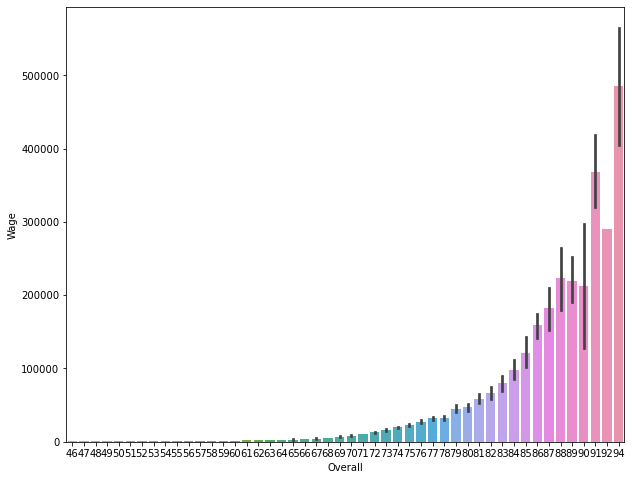

In [62]:
plt.figure(figsize=(10,8))
sns.barplot(x='Overall', y = 'Wage', data=df1)

In [49]:
def Over_L2(x):
    if 46<= x <=62 : return 'o1'
    elif 63<= x <=68 : return 'o2'
    elif 69<= x <=72: return 'o3'
    elif 73<= x <=75: return 'o4'
    elif 76<= x <=78: return 'o5'
    elif 79<= x <=80: return 'o6'
    elif 81<= x <=82: return 'o7'
    elif 83==x: return 'o8'
    elif 84==x: return 'o9'
    elif 85==x: return 'o10'
    elif 86==x: return 'o11'
    elif 87==x: return 'o12'
    elif 88==x: return 'o13'
    elif 89==x: return 'o14'
    elif 90==x: return 'o15'
    elif 91==x: return 'o16'
    elif 92==x: return 'o17'
    elif 93<= x <=94 : return 'o18'
df1['Over_L2']=df1.Overall.apply(Over_L2)

In [50]:
df['Over_L2']=df.Overall.apply(Over_L2)

In [77]:
df1[df1.Over_L2.isnull()]

,Name,Classified,Age,Nationality,Overall,Potential,Club_Cat,Club,Value,Wage,Special,Preferred Foot,International Reputation,Position_Class,Weak Foot,Age_L2,Over_L2


Position

In [51]:
df1.Position_Class.value_counts()

Defender      7202
Midfielder    5343
Forward       3381
GoalKeeper    2040
Name: Position_Class, dtype: int64

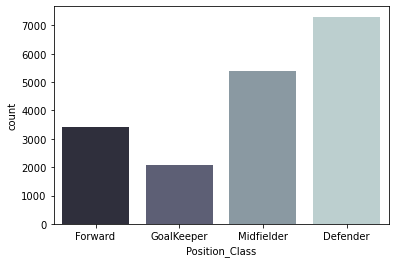

In [41]:
sns.countplot('Position_Class', data= df1, palette = 'bone')

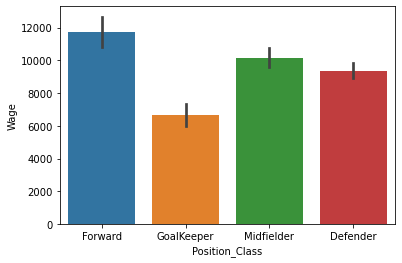

In [42]:
sns.barplot(x ='Position_Class', y = 'Wage', data=df1 )

Special

In [83]:
df1.Special.describe()

count    18207.000000
mean      1597.809908
std        272.586016
min        731.000000
25%       1457.000000
50%       1635.000000
75%       1787.000000
max       2346.000000
Name: Special, dtype: float64

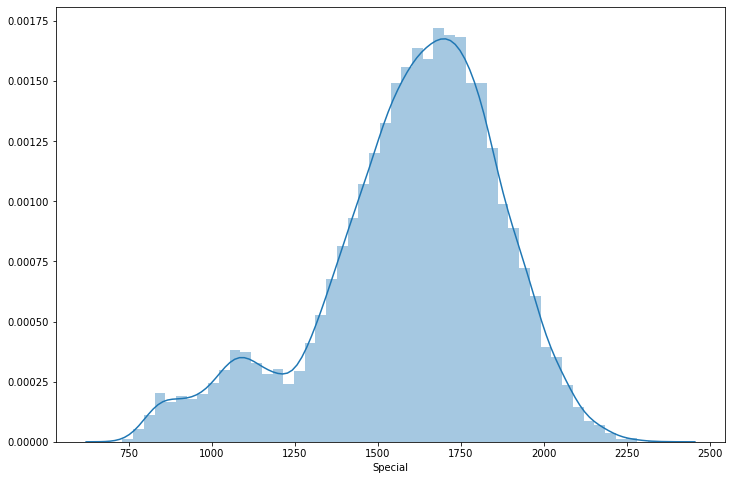

In [85]:
plt.figure(figsize=(12,8))
sns.distplot(df1.Special)

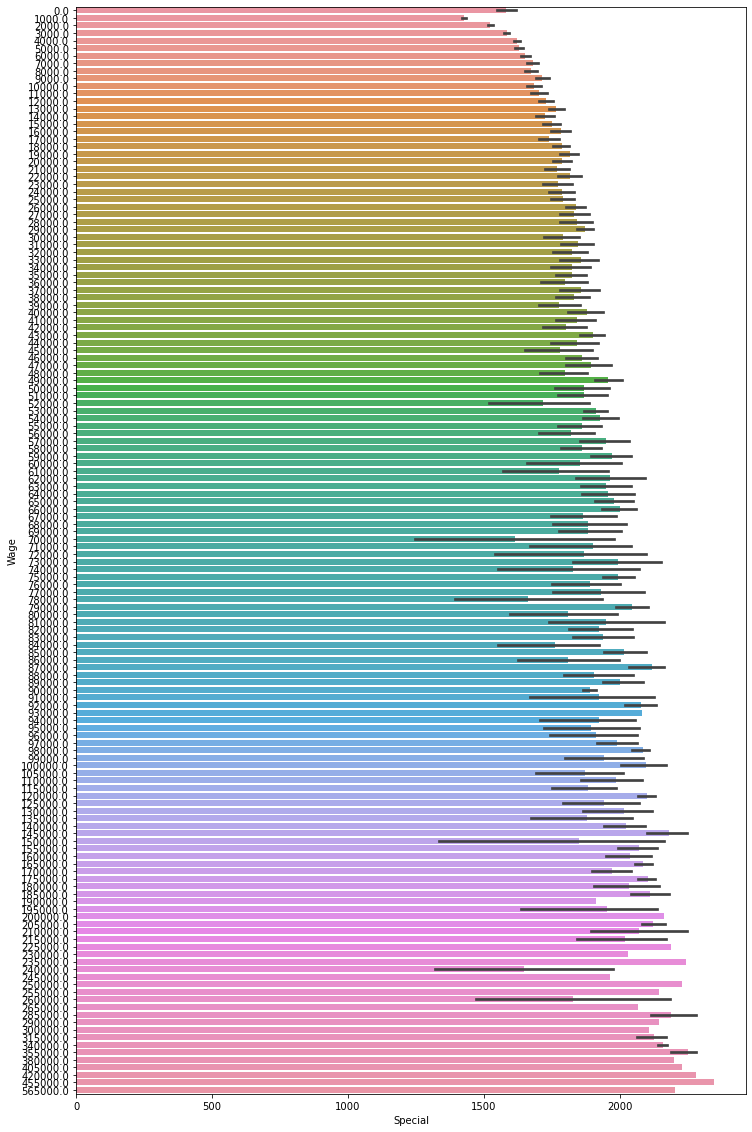

In [91]:
plt.figure(figsize=(12,20))
sns.barplot(x='Special', y ='Wage', data=df1, orient='h')

In [ ]:
스페셜 구분( 스페셜값에서 2000을 기준으로 슈퍼스페셜과 아닌 것 구분)
2000으로 나눈 이유는 2000부터 Wage가 크게 차기 나기 때문

In [52]:
def Special_L2(x):
    if x<2000: return 'Not_SS'
    elif 2000 <= x: return 'SS'
df1['Special_L2']= df1.Special.apply(Special_L2)

In [53]:
df['Special_L2']= df.Special.apply(Special_L2)

In [78]:
df1.head()

,Name,Classified,Age,Nationality,Overall,Potential,Club_Cat,Club,Value,Wage,Special,Preferred Foot,International Reputation,Position_Class,Weak Foot,Age_L2,Over_L2
0,L. Messi,0,31,Argentina,94,94,3,FC Barcelona,110500000.0,565000.0,2202,1.0,5.0,3,4.0,6,o18
1,Cristiano Ronaldo,2,33,Portugal,94,94,3,Juventus,77000000.0,405000.0,2228,0.0,5.0,3,4.0,7,o18
2,Neymar Jr,0,26,Brazil,92,93,2,Paris Saint-Germain,118500000.0,290000.0,2143,0.0,5.0,3,5.0,4,o17
3,De Gea,2,27,Spain,91,93,3,Manchester United,72000000.0,260000.0,1471,0.0,4.0,0,3.0,5,o16
4,K. De Bruyne,2,27,Belgium,91,92,3,Manchester City,102000000.0,355000.0,2281,0.0,4.0,2,5.0,5,o16


In [44]:
df1['Position_Class'].replace({'Forward':3, 'Midfielder':2, 'Defender':1, 'GoalKeeper':0}, inplace = True) # 숫자를 바꾸면 상관관계의 부호가 달라진다???

In [54]:
df['Position_Class'].replace({'Forward':3, 'Midfielder':2, 'Defender':1, 'GoalKeeper':0}, inplace = True) # 숫자를 바꾸면 상관관계의 부호가 달라진다???

Body Type, Real Face, Loaned From(결측치가 너무 많음) 선삭제

In [46]:
df2 = df[['Wage','Skill Moves', 'Work Rate',
       'Position', 'Jersey Number', 'Joined', 
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions',]]
df2.head()

,Wage,Skill Moves,Work Rate,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,...,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions
0,565000.0,4.0,Medium/ Medium,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,84.0,...,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0
1,405000.0,5.0,High/ Low,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,84.0,...,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0
2,290000.0,5.0,High/ Medium,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,79.0,...,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0
3,260000.0,1.0,Medium/ Medium,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,17.0,...,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0
4,355000.0,4.0,High/ High,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,93.0,...,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0


In [47]:
df2.isnull().sum()

Wage                       0
Skill Moves               48
Work Rate                 48
Position                  48
Jersey Number             48
Joined                  1312
Contract Valid Until      48
Height                    48
Weight                    48
Crossing                  48
Finishing                 48
HeadingAccuracy           48
ShortPassing              48
Volleys                   48
Dribbling                 48
Curve                     48
FKAccuracy                48
LongPassing               48
BallControl               48
Acceleration              48
SprintSpeed               48
Agility                   48
Reactions                 48
dtype: int64

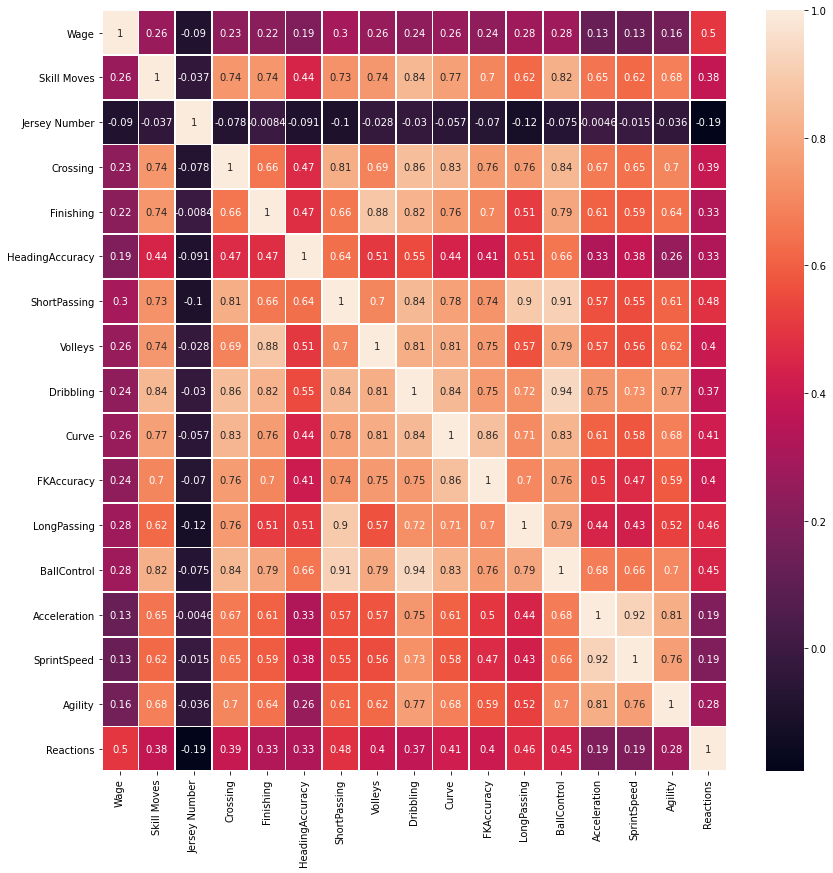

In [48]:
plt.figure(figsize=(14,14))
sns.heatmap(df2.corr(),linewidths=.8, annot=True) # Reaction, Release Clause

In [49]:
df2.head()

,Wage,Skill Moves,Work Rate,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,...,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions
0,565000.0,4.0,Medium/ Medium,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,84.0,...,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0
1,405000.0,5.0,High/ Low,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,84.0,...,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0
2,290000.0,5.0,High/ Medium,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,79.0,...,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0
3,260000.0,1.0,Medium/ Medium,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,17.0,...,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0
4,355000.0,4.0,High/ High,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,93.0,...,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0


In [ ]:
Work Rate # 음 코드 조금만 더 보완하기. ' ' 가 존재한다. 영향있는 변수가 아니므로 코드만 작성

In [50]:
wr = df2['Work Rate'].str.split('/', expand=True)
df2['Attack_WR']= wr[0]
df2['Attack_WR'].replace({'High':2, 'Medium':1,'Low':0},inplace= True)

In [51]:
df2['Defence_WR']=wr[1]
df2['Defence_WR'].replace({' High':2, ' Medium':1,' Low':0},inplace= True)

In [52]:
df2.Attack_WR.unique()
df2.Defence_WR.unique()

array([ 1.,  0.,  2., nan])

In [57]:
wr = df['Work Rate'].str.split('/', expand=True)
df['Attack_WR']= wr[0]
df['Attack_WR'].replace({'High':2, 'Medium':1,'Low':0},inplace= True)
df['Defence_WR']=wr[1]
df['Defence_WR'].replace({' High':2, ' Medium':1,' Low':0},inplace= True)

In [59]:
df.Attack_WR.unique()
# df.Defence_WR.unique()

array([1, 2, 0], dtype=int64)

In [247]:
df2[df2['Joined'].isnull()].head()

,Wage,Skill Moves,Work Rate,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,...,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions
28,315000.0,4.0,Medium/ Medium,LAM,10.0,NaN,"Jun 30, 2019",5'11,172lbs,90.0,...,90.0,85.0,89.0,86.0,83.0,90.0,73.0,67.0,83.0,85.0
38,245000.0,3.0,High/ Medium,LS,9.0,NaN,"Jun 30, 2019",6'1,196lbs,68.0,...,90.0,84.0,74.0,62.0,59.0,85.0,73.0,73.0,75.0,86.0
91,235000.0,3.0,High/ High,LDM,9.0,NaN,"Jun 30, 2019",6'0,157lbs,64.0,...,75.0,82.0,66.0,72.0,80.0,84.0,73.0,73.0,69.0,84.0
166,18000.0,4.0,High/ Medium,CAM,24.0,NaN,"Dec 31, 2018",6'3,176lbs,78.0,...,76.0,82.0,86.0,87.0,79.0,84.0,77.0,76.0,76.0,79.0
176,165000.0,4.0,High/ High,LCM,17.0,NaN,"Jun 30, 2019",5'9,172lbs,73.0,...,76.0,88.0,78.0,68.0,82.0,89.0,84.0,74.0,81.0,70.0


In [60]:
df3=df[['Wage','Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']]
df3.head()

,Wage,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,565000.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,405000.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,290000.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,260000.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,355000.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [61]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Wage            17918 non-null  float64
 1   Balance         17918 non-null  float64
 2   ShotPower       17918 non-null  float64
 3   Jumping         17918 non-null  float64
 4   Stamina         17918 non-null  float64
 5   Strength        17918 non-null  float64
 6   LongShots       17918 non-null  float64
 7   Aggression      17918 non-null  float64
 8   Interceptions   17918 non-null  float64
 9   Positioning     17918 non-null  float64
 10  Vision          17918 non-null  float64
 11  Penalties       17918 non-null  float64
 12  Composure       17918 non-null  float64
 13  Marking         17918 non-null  float64
 14  StandingTackle  17918 non-null  float64
 15  SlidingTackle   17918 non-null  float64
 16  GKDiving        17918 non-null  float64
 17  GKHandling      17918 non-null 

In [384]:
# df3['Release Clause'] = df3['Release Clause'].astype('str')

In [391]:
df3['Release Clause']=df3['Release Clause'].apply(lambda x: exchange(x)).astype(float)

In [392]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Wage            17918 non-null  float64
 1   Balance         17918 non-null  float64
 2   ShotPower       17918 non-null  float64
 3   Jumping         17918 non-null  float64
 4   Stamina         17918 non-null  float64
 5   Strength        17918 non-null  float64
 6   LongShots       17918 non-null  float64
 7   Aggression      17918 non-null  float64
 8   Interceptions   17918 non-null  float64
 9   Positioning     17918 non-null  float64
 10  Vision          17918 non-null  float64
 11  Penalties       17918 non-null  float64
 12  Composure       17918 non-null  float64
 13  Marking         17918 non-null  float64
 14  StandingTackle  17918 non-null  float64
 15  SlidingTackle   17918 non-null  float64
 16  GKDiving        17918 non-null  float64
 17  GKHandling      17918 non-null 

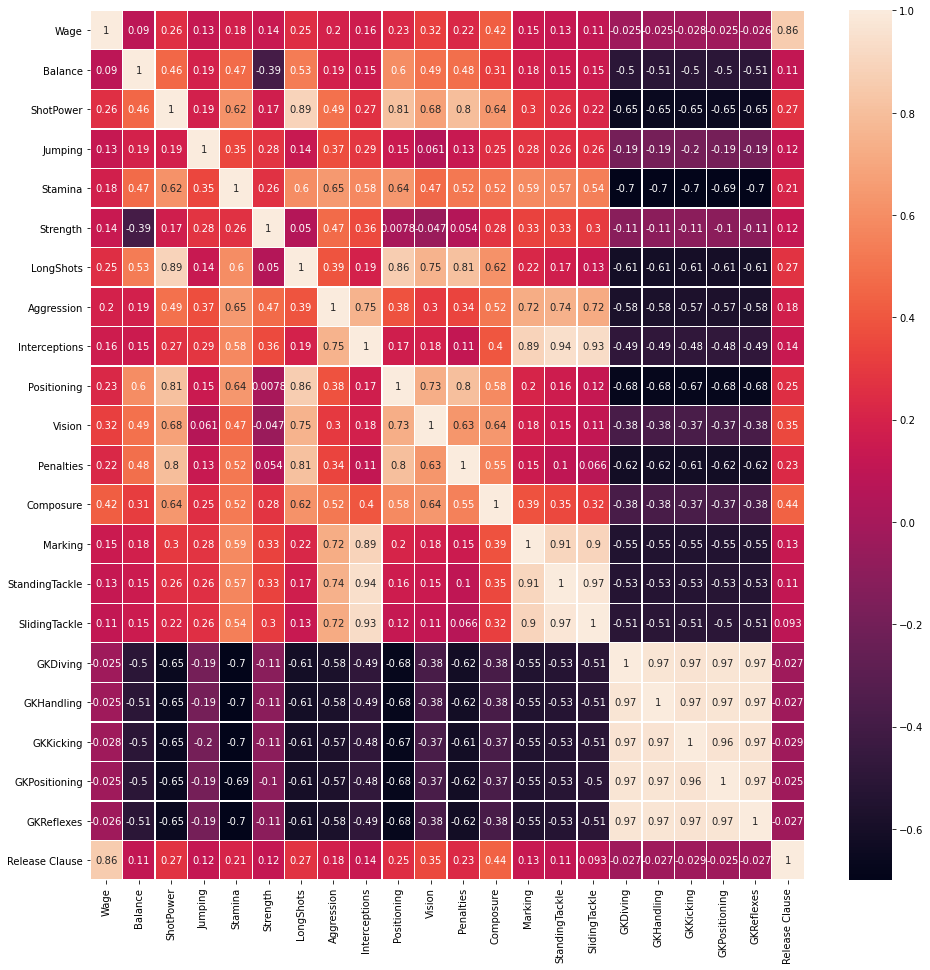

In [393]:
plt.figure(figsize=(16,16))
sns.heatmap(df3.corr(),linewidths=.3, annot=True) #그나마 composure

In [ ]:
df.drop(['Body Type', 'Real Face','Position','Jersey Number',
       'Height', 'Weight'],axis=1,inplace=True)

In [115]:
df.to_csv('fifa.csv')

In [3]:
df = pd.read_csv('fifa.csv')
df.head()

,Unnamed: 0,Name,Classified,Age,Nationality,Overall,Potential,Club_Cat,Position_Class,Club,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Age_L2,Over_L2,Special_L2,Attack_WR,Defence_WR
0,0,L. Messi,0,31,Argentina,94,94,3,3,FC Barcelona,...,11.0,15.0,14.0,8.0,226500000.0,6,o18,SS,1,1
1,1,Cristiano Ronaldo,2,33,Portugal,94,94,3,3,Juventus,...,11.0,15.0,14.0,11.0,127100000.0,7,o18,SS,2,0
2,2,Neymar Jr,0,26,Brazil,92,93,2,3,Paris Saint-Germain,...,9.0,15.0,15.0,11.0,228100000.0,4,o17,SS,2,1
3,3,De Gea,2,27,Spain,91,93,3,0,Manchester United,...,85.0,87.0,88.0,94.0,138600000.0,5,o16,Not_SS,1,1
4,4,K. De Bruyne,2,27,Belgium,91,92,3,2,Manchester City,...,13.0,5.0,10.0,13.0,196400000.0,5,o16,SS,2,2


In [4]:
df.columns

Index(['Unnamed: 0', 'Name', 'Classified', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club_Cat', 'Position_Class', 'Club', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Age_L2', 'Over_L2', 'Special_L2', 'Attack_WR',
       'Defence_WR'],
      dtype='object')

In [4]:
df1=df.copy()
df1.drop(['Preferred Foot','Weak Foot','Skill Moves','Loaned From','Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'], axis=1, inplace=True)

In [5]:
df1.drop(['Nationality', 'Contract Valid Until','Work Rate'], axis=1, inplace = True)

In [7]:
df1.drop('Unnamed: 0.1', axis=1, inplace= True)

In [8]:
df1.columns

Index(['Name', 'Club_Cat_N', 'Classified', 'Age', 'Overall', 'Potential',
       'Club_Value', 'Club_Cat', 'Position_Class', 'Club', 'Value', 'Wage',
       'Special', 'International Reputation', 'Composure', 'Age_L2', 'Over_L2',
       'Special_L2', 'Attack_WR', 'Defence_WR', 'Composure_C'],
      dtype='object')

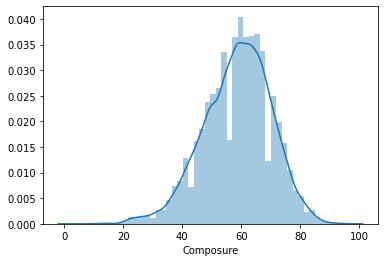

In [8]:
sns.distplot(df1.Composure)

In [9]:
df1.describe()

,Classified,Age,Overall,Potential,Club_Cat,Position_Class,Value,Wage,Special,International Reputation,Composure,Release Clause,Age_L2,Attack_WR,Defence_WR
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,1.791800e+04,17918.000000,17918.000000,17918.000000,17918.000000,1.664300e+04,17918.000000,17918.000000,17918.000000
mean,1.589854,25.105257,66.236801,71.329334,0.157774,1.564405,2.448629e+06,9883.748186,1598.111731,1.113908,58.655263,4.585061e+06,3.806284,1.218495,1.086059
std,0.953540,4.675372,6.929243,6.144098,0.471607,0.919582,5.631804e+06,22142.768987,272.983157,0.395495,11.420965,1.111872e+07,2.030144,0.521759,0.502786
min,0.000000,16.000000,46.000000,48.000000,0.000000,0.000000,0.000000e+00,1000.000000,731.000000,1.000000,3.000000,1.300000e+04,1.000000,0.000000,0.000000
25%,1.000000,21.000000,62.000000,67.000000,0.000000,1.000000,3.250000e+05,1000.000000,1457.000000,1.000000,51.000000,5.250000e+05,2.000000,1.000000,1.000000
50%,2.000000,25.000000,66.000000,71.000000,0.000000,1.000000,7.000000e+05,3000.000000,1636.000000,1.000000,60.000000,1.100000e+06,4.000000,1.000000,1.000000
75%,2.000000,28.000000,71.000000,75.000000,0.000000,2.000000,2.100000e+06,9000.000000,1787.000000,1.000000,67.000000,3.500000e+06,5.000000,2.000000,1.000000
max,4.000000,45.000000,94.000000,95.000000,3.000000,3.000000,1.185000e+08,565000.000000,2346.000000,5.000000,96.000000,2.281000e+08,11.000000,2.000000,2.000000


In [ ]:
Composure,사분위수를 기준으로 분할(51, 60, 67)

In [10]:
bins = [0,50, 60, 70, 96]
group_names=[0,1,2,3]
df1['Composure_C']=pd.cut(df1['Composure'], bins, labels=group_names, include_lowest=True)

In [11]:
df1[df1['Release Clause'].isnull()].head()

,Name,Classified,Age,Overall,Potential,Club_Cat,Position_Class,Club,Value,Wage,...,International Reputation,Joined,Composure,Release Clause,Age_L2,Over_L2,Special_L2,Attack_WR,Defence_WR,Composure_C
28,J. Rodríguez,0,26,88,89,2,2,FC Bayern München,69500000.0,315000.0,...,4.0,NaN,87.0,NaN,4,o13,SS,1,1,3
38,G. Higuaín,0,30,88,88,2,3,Milan,57000000.0,245000.0,...,4.0,NaN,86.0,NaN,6,o13,Not_SS,2,1,3
91,Paulinho,0,29,85,85,0,1,Guangzhou Evergrande Taobao FC,37000000.0,235000.0,...,3.0,NaN,80.0,NaN,5,o10,SS,2,2,3
166,Anderson Talisca,0,24,83,90,0,2,Guangzhou Evergrande Taobao FC,36500000.0,18000.0,...,2.0,NaN,74.0,NaN,3,o8,SS,2,1,3
176,M. Kovačić,2,24,83,89,2,2,Chelsea,35000000.0,165000.0,...,3.0,NaN,72.0,NaN,3,o8,SS,2,2,3


In [79]:
df1[df1['Release Clause'].isnull()].tail()

,Name,Classified,Potential,Club_Cat,Position_Class,Club,Value,Wage,International Reputation,Joined,Composure,Release Clause,Age_L2,Over_L2,Special_L2,Attack_WR,Defence_WR
17979,Zhang Yuan,3,60,NaN,2,Guizhou Hengfeng FC,60000.0,2000.0,1.0,NaN,43.0,NaN,2,o1,Not_SS,1,1
18026,Chen Ji,3,59,NaN,2,Guizhou Hengfeng FC,50000.0,2000.0,1.0,NaN,38.0,NaN,2,o1,Not_SS,1,1
18031,Zhou Xin,3,61,NaN,1,Stabæk Fotball,40000.0,2000.0,1.0,NaN,32.0,NaN,2,o1,Not_SS,1,1
18056,L. Valeau,2,65,NaN,2,Ascoli,60000.0,3000.0,1.0,NaN,42.0,NaN,1,o1,Not_SS,1,1
18183,K. Pilkington,2,48,NaN,0,Cambridge United,0.0,1000.0,1.0,"Aug 17, 2018",56.0,NaN,11,o1,Not_SS,1,1


In [12]:
df1.isnull().sum()

Name                           0
Classified                     0
Age                            0
Overall                        0
Potential                      0
Club_Cat                       0
Position_Class                 0
Club                           0
Value                          0
Wage                           0
Special                        0
International Reputation       0
Joined                      1264
Composure                      0
Release Clause              1275
Age_L2                         0
Over_L2                        0
Special_L2                     0
Attack_WR                      0
Defence_WR                     0
Composure_C                    0
dtype: int64

In [ ]:
Release Cluase 가 nan인 경우 : Value가 0이거나 joined가 nan

In [130]:
df1.query('Value==0')[['Name', 'Club', 'Value', 'Wage', 'Joined', 'Release Clause', 'Age_L2']]

,Name,Club,Value,Wage,Joined,Release Clause,Age_L2
860,Hilton,Montpellier HSC,0.0,18000.0,"Aug 1, 2011",NaN,11
3503,S. Nakamura,Júbilo Iwata,0.0,4000.0,"Jan 10, 2017",NaN,11
4168,B. Nivet,ESTAC Troyes,0.0,5000.0,"Jul 1, 2012",NaN,11
10192,F. Kippe,Lillestrøm SK,0.0,1000.0,"Feb 22, 2002",NaN,11
12008,H. Sulaimani,Ohod Club,0.0,3000.0,"Jun 11, 2018",NaN,11
12267,W. Díaz,Jaguares de Córdoba,0.0,1000.0,"Jan 10, 2016",NaN,11
13880,Y. Nakazawa,Yokohama F. Marinos,0.0,1000.0,"Jan 1, 2002",NaN,11
17383,R. Kawai,Hokkaido Consadole Sapporo,0.0,1000.0,"Jan 1, 2011",NaN,10
17437,T. Warner,Accrington Stanley,0.0,1000.0,"Aug 3, 2018",NaN,11
17463,S. Phillips,Yeovil Town,0.0,1000.0,"Aug 1, 2017",NaN,11


In [13]:
df1.drop(['Joined','Release Clause'], axis=1, inplace = True)

In [37]:
df1.Club.unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [23]:
# df1.drop('Club_Cat_N', axis=1, inplace= True)

In [24]:
# 클럽 범주화(나라별)
df1.insert(1,'Club_Cat_N',
            df.apply(lambda x: 
            'SPAIN' if x['Club'] in ['Athletic Club de Bilbao','Atlético Madrid','CD Leganés','Deportivo Alavés','FC Barcelona',
             'Getafe CF','Girona FC','Levante UD','Real Valladolid CF','Rayo Vallecano','RC Celta','RCD Espanyol',
             'Real Betis','Real Madrid','Real Sociedad','SD Eibar','SD Huesca','Sevilla FC','Valencia CF', 'Villarreal CF']
                     
            else 'ENGLAND' if x['Club'] in ['Arsenal','Leicester City', 'Newcastle United','Chelsea','Crystal Palace','Brighton & Hove Albion',
            'Burnley','Everton','Ipswich Town','Liverpool','Manchester City','Bournemouth', 'Manchester United','Middlesbrough',
            'Watford','Cardiff City', 'Nottingham Forest','Huddersfield Town', 'Southampton', 'Tottenham Hotspur', 'West Ham United', 
                                           'Wolverhampton Wanderers', 'West Ham United', 'Fulham', 'West Bromwich Albion', 'Celtic']
                     
            else 'GERMANY' if x['Club'] in ['FC Bayern München','Borussia Dortmund','RB Leipzig','Bayer 04 Leverkusen','Borussia Mönchengladbach',
                'VfL Wolfsburg','Eintracht Frankfurt','SV Werder Bremen','TSG 1899 Hoffenheim','Fortuna Düsseldorf','Hertha BSC',
                '1. FSV Mainz 05','SC Freiburg','FC Schalke 04','FC Augsburg','VfB Stuttgart','Hannover 96','1. FC Nürnberg','1. FC Köln']
                     
            else 'FRANCE' if x['Club'] in  ['Dijon FCO','Nîmes Olympique','Amiens SC','Angers SCO','FC Girondins de Bordeaux','Stade Malherbe Caen',
              'En Avant de Guingamp','LOSC Lille','Olympique de Marseille','Olympique Lyonnais','AS Monaco','Montpellier HSC',
              'FC Nantes','OGC Nice','Paris Saint-Germain','Stade Rennais FC','Stade de Reims','AS Saint-Étienne',
              'RC Strasbourg Alsace','Toulouse Football Club']
                     
            else 'ITALY' if x['Club'] in ['Sampdoria','Fiorentina','Atalanta','Bologna','Cagliari','Chievo Verona','Empoli','Frosinone',
               'Genoa','Inter','Juventus','Lazio','Milan','Napoli','Parma','Roma','Sassuolo','SPAL','Torino','Udinese']
                     
            else 'FRANCE' if x['Club'] in  ['Dijon FCO','Nîmes Olympique','Amiens SC','Angers SCO','FC Girondins de Bordeaux','Stade Malherbe Caen',
              'En Avant de Guingamp','LOSC Lille','Olympique de Marseille','Olympique Lyonnais','AS Monaco','Montpellier HSC',
              'FC Nantes','OGC Nice','Paris Saint-Germain','Stade Rennais FC','Stade de Reims','AS Saint-Étienne',
              'RC Strasbourg Alsace','Toulouse Football Club']
                     
            else 'BELGIUM' if x['Club'] in ['América FC (Minas Gerais)','Atlético Paranaense','Atlético Mineiro','Bahia',
             'Botafogo','Ceará Sporting Club','Chapecoense','Cruzeiro','Fluminense','Grêmio', 'Internacional','Paraná',
                                            'Santos','Sport Club do Recife','Vitória','Club Brugge KV', 'KRC Genk', 
                                            'RSC Anderlecht', 'KAA Gent']
                     
            else 'CHINA' if x['Club'] in  ['Beijing Sinobo Guoan FC','Beijing Renhe FC','Changchun Yatai FC','Chongqing Dangdai Lifan FC SWM Team',
             'Dalian YiFang FC','Guangzhou Evergrande Taobao FC','Guangzhou R&F; FC','Guizhou Hengfeng FC',
             'Hebei China Fortune FC','Henan Jianye FC','Jiangsu Suning FC','Shandong Luneng TaiShan FC',
             'Shanghai Greenland Shenhua FC','Shanghai SIPG FC','Tianjin Quanjian FC', 'Tianjin TEDA FC']
                     
            else 'JAPAN' if x['Club'] in ['Cerezo Osaka','FC Tokyo','Gamba Osaka','Hokkaido Consadole Sapporo','Júbilo Iwata','Kashima Antlers',
             'Kashiwa Reysol','Kawasaki Frontale','Nagoya Grampus','Sagan Tosu','Shimizu S-Pulse','Sanfrecce Hiroshima',
             'Shonan Bellmare','Urawa Red Diamonds','Vegalta Sendai','Vissel Kobe','V-Varen Nagasaki', 'Yokohama F. Marinos']
                           
            else 'KOREA' if x['Club'] in  ['Daegu FC','FC Seoul','Gangwon FC','Gyeongnam FC','Incheon United FC','Jeju United FC',
             'Jeonbuk Hyundai Motors','Jeonnam Dragons','Pohang Steelers','Sangju Sangmu FC', 'Suwon Samsung Bluewings','Ulsan Hyundai FC']
                    
             else 'NETHERLANDS' if x['Club'] in ['ADO Den Haag','Ajax','AZ Alkmaar','De Graafschap','Excelsior','FC Emmen','FC Groningen',
             'FC Utrecht','Feyenoord','Fortuna Sittard','Heracles Almelo','NAC Breda','PEC Zwolle','PSV','SC Heerenveen','Vitesse','VVV-Venlo',
                                                 'Willem II']
                     
            else 'PORTUGAL' if x['Club'] in ['Os Belenenses','Boavista FC','CD Feirense','CD Tondela','CD Aves','FC Porto','Clube Sport Marítimo',
             'GD Chaves','Moreirense FC','Portimonense SC','Rio Ave FC','Santa Clara','SC Braga','SL Benfica','Sporting CP',
             'Vitória Guimarães','Vitória de Setúbal']
                    
            else 'SAUDI' if x['Club'] in ['Al Ahli','Al Batin','Al Faisaly','Al Fateh','Al Fayha','Al Hazem','Al Hilal','Al Ittihad',
             'Al Nassr','Al Qadisiyah','Al Raed','Al Shabab','Al Wehda','Al Taawoun','Ettifaq FC','Ohod Club']
                     
            else 'ARGENTINA' if x['Club'] in  ['Club Atlético Aldosivi','Argentinos Juniors','Atlético Tucumán','Club Atlético Banfield',
             'Belgrano de Córdoba','Club Atlético Colón','Defensa y Justicia','Estudiantes de La Plata',
             'Gimnasia y Esgrima La Plata','Godoy Cruz','Club Atlético Huracán','Independiente',
             'Club Atlético Lanús',"Newell's Old Boys",'Patronato','Racing Club','River Plate',
             'Rosario Central','San Lorenzo de Almagro','San Martín de San Juan','San Martin de Tucumán',
             'Club Atlético Talleres','Club Atlético Tigre','Unión de Santa Fe','Vélez Sarsfield','Boca Juniors']
                     
            else 'CHILE' if x['Club'] in ['Audax Italiano','CD Antofagasta','CD Huachipato',"CD O'Higgins",'CD Palestino','Curicó Unido',
             'Deportes Iquique','Club Deportes Temuco','CD Everton de Viña del Mar','San Luis de Quillota',
             'Universidad Católica','CD Universidad de Concepción','Universidad de Chile','Unión Española','Unión La Calera','Colo-Colo']
                                            
            else 'America' if x['Club'] in ['LA Galaxy', 'New York City FC', 'Atlanta United', 'Montreal Impact', 
                                            'Portland Timbers', 'Chicago Fire','DC United', 'Seattle Sounders FC']
                     
            else 'Turkey' if x['Club'] in ['Medipol Başakşehir FK', 'Galatasaray' ,'Göztepe SK', 'Fenerbahçe SK', 'Beşiktaş JK','Trabzonspor']
                     
            else 'OTHER', axis =1))

In [25]:
df1.Club_Cat_N.value_counts()

OTHER          10162
ENGLAND          796
ARGENTINA        721
SPAIN            616
GERMANY          575
FRANCE           568
ITALY            545
JAPAN            524
NETHERLANDS      504
SAUDI            466
PORTUGAL         456
CHINA            443
CHILE            441
BELGIUM          409
KOREA            333
America          217
Turkey           142
Name: Club_Cat_N, dtype: int64

In [25]:
# df1.drop('Name', axis=1, inplace= True)

In [38]:
df1[df1['Club_Cat_N']=='OTHER'][101:150]

,Club_Cat_N,Classified,Age,Overall,Potential,Club_Cat,Position_Class,Club,Value,Wage,Special,International Reputation,Composure,Age_L2,Over_L2,Special_L2,Attack_WR,Defence_WR,Composure_C
888,OTHER,2,29,78,78,0,2,LA Galaxy,10000000.0,11000.0,2058,2.0,77.0,5,o5,SS,2,1,3
901,OTHER,2,30,77,77,0,1,FC Basel 1893,6500000.0,26000.0,1824,1.0,77.0,6,o5,Not_SS,0,2,3
905,OTHER,2,34,77,77,0,3,BSC Young Boys,4700000.0,26000.0,1831,2.0,77.0,8,o5,Not_SS,1,0,3
911,OTHER,2,27,77,78,0,2,Dynamo Kyiv,10000000.0,1000.0,1820,1.0,76.0,5,o5,Not_SS,2,2,3
914,OTHER,2,29,77,77,0,2,KAA Gent,8500000.0,24000.0,2035,2.0,75.0,5,o5,SS,2,1,3
915,OTHER,0,32,77,77,1,0,Tigres U.A.N.L.,5000000.0,38000.0,1334,3.0,65.0,7,o5,Not_SS,1,1,2
916,OTHER,0,27,77,78,0,1,Boca Juniors,8000000.0,22000.0,1976,1.0,70.0,5,o5,Not_SS,2,0,2
919,OTHER,1,29,77,77,0,2,Standard de Liège,8500000.0,19000.0,1923,2.0,84.0,5,o5,Not_SS,2,0,3
925,OTHER,2,25,77,80,1,2,Galatasaray SK,11000000.0,51000.0,1997,1.0,74.0,4,o5,Not_SS,2,2,3
927,OTHER,2,25,77,81,0,2,KRC Genk,11500000.0,17000.0,2085,1.0,75.0,4,o5,SS,1,1,3


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      17918 non-null  object 
 1   Club_Cat_N                17918 non-null  object 
 2   Classified                17918 non-null  int64  
 3   Age                       17918 non-null  int64  
 4   Overall                   17918 non-null  int64  
 5   Potential                 17918 non-null  int64  
 6   Club_Cat                  17918 non-null  int64  
 7   Position_Class            17918 non-null  int64  
 8   Club                      17918 non-null  object 
 9   Value                     17918 non-null  float64
 10  Wage                      17918 non-null  float64
 11  Special                   17918 non-null  int64  
 12  International Reputation  17918 non-null  float64
 13  Composure                 17918 non-null  float64
 14  Age_L2

In [17]:
df1.Composure_C = df1.Composure_C.astype(float)

In [55]:
df1.to_csv('fifa1.csv')

In [1]:
df1 = pd.read_csv('fifa1.csv')
df1.head(10)

NameError: name 'pd' is not defined

In [ ]:
Club_Cat_N,Over_L2, Special_L2# 더미를 할거지만.. 히트맵으로 상관관계를 보기 위해서 실수화를 해봄

In [23]:
df1_h=df1.copy()

In [24]:
df1_h.columns

Index(['Name', 'Club_Cat_N', 'Classified', 'Age', 'Overall', 'Potential',
       'Club_Value', 'Club_Cat', 'Position_Class', 'Club', 'Value', 'Wage',
       'Special', 'International Reputation', 'Composure', 'Age_L2', 'Over_L2',
       'Special_L2', 'Attack_WR', 'Defence_WR', 'Composure_C'],
      dtype='object')

In [14]:
df1.Position_Class.unique()

array([3, 0, 2, 1], dtype=int64)

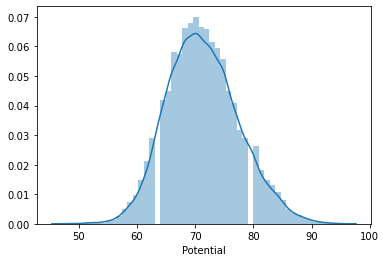

In [13]:
sns.distplot(df1_h.Potential)

In [25]:
df1_h.Club_Cat_N.replace({'SPAIN':0, 'ITALY':1, 'FRANCE':2, 'ENGLAND':3,'GERMANY':4,'JAPAN':5,'CHINA':6, 'PORTUGAL':7,
                      'BELGIUM':8, 'NETHERLANDS':9,'SAUDI':10, 'ARGENTINA':11,'CHILE':12, 'KOREA':13, 'Turkey':14, 'America':15,'OTHER':16 }, inplace= True)
df1_h.Over_L2.replace({'o18':18, 'o17':17, 'o16':16, 'o15':15, 'o14':14, 'o13':13, 'o12':12, 'o11':11, 'o10':10,
       'o9':9, 'o8':8, 'o7':7, 'o6':6, 'o5':5, 'o4':4, 'o3':3, 'o2':2, 'o1':1}, inplace=True)
df1_h.Special_L2.replace({'SS':1, 'Not_SS':0}, inplace=True)

In [26]:
df1_h.drop(['Classified','Age','Attack_WR', 'Defence_WR','Age_L2'], axis=1, inplace=True)# position 체크하기

In [61]:
# df1_h.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [27]:
df1_h.columns

Index(['Name', 'Club_Cat_N', 'Overall', 'Potential', 'Club_Value', 'Club_Cat',
       'Position_Class', 'Club', 'Value', 'Wage', 'Special',
       'International Reputation', 'Composure', 'Over_L2', 'Special_L2',
       'Composure_C'],
      dtype='object')

In [59]:
#칼럼 순서 바꾸기
df1_h=df1_h[['Name','Wage','Value','Overall','Potential','Over_L2','Club','Club_Value','Club_Cat_N','Club_Cat','Composure','Composure_C','Special','Special_L2',
            'International Reputation','Position_Class']]

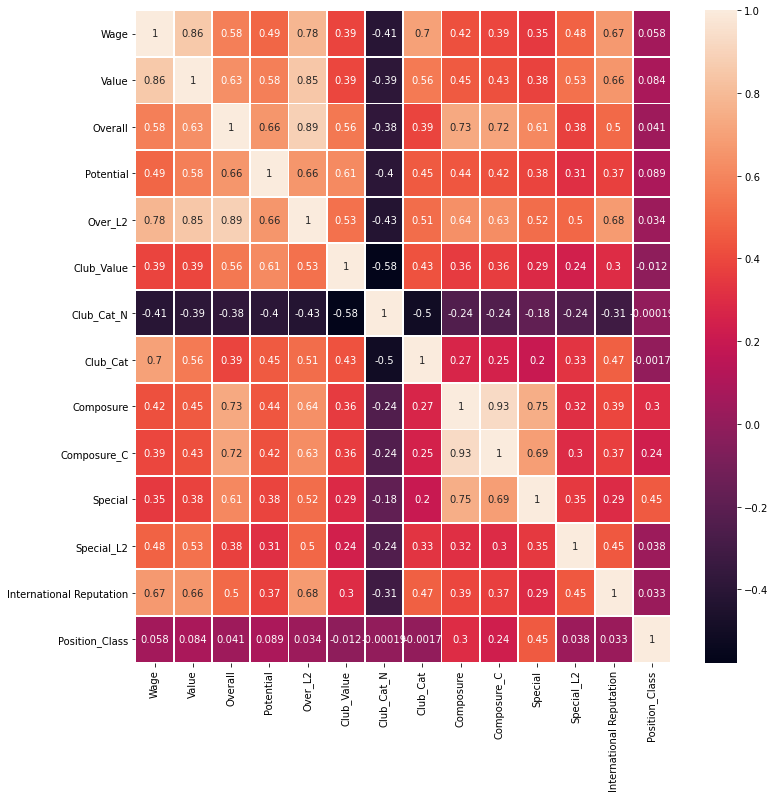

In [60]:
plt.figure(figsize=(12,12))
sns.heatmap(df1_h.corr(),linewidths=.8, annot=True)

In [30]:
df1_h2=df1_h[['Name','Wage','Value','Potential','Over_L2','Club_Cat_N','Composure','Special_L2','International Reputation']]

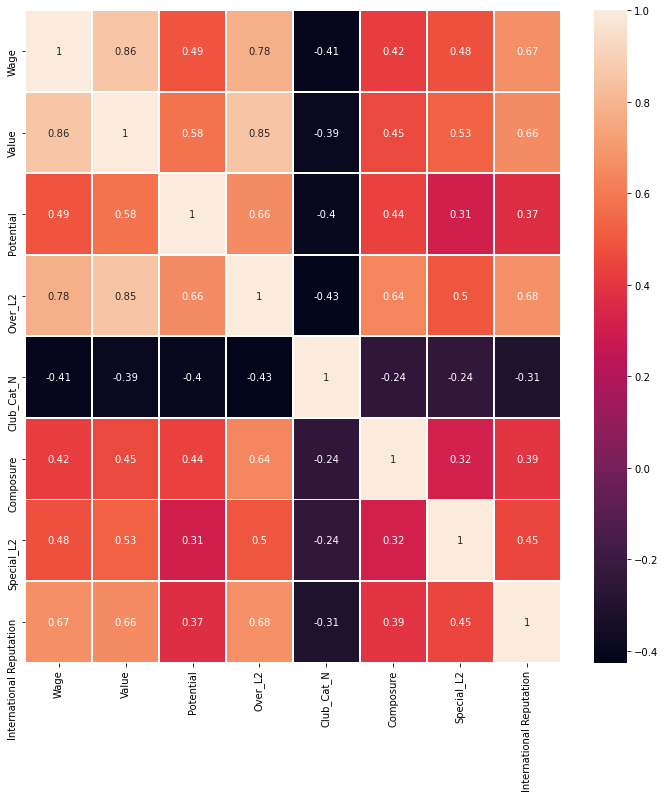

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(df1_h2.corr(),linewidths=.8, annot=True)

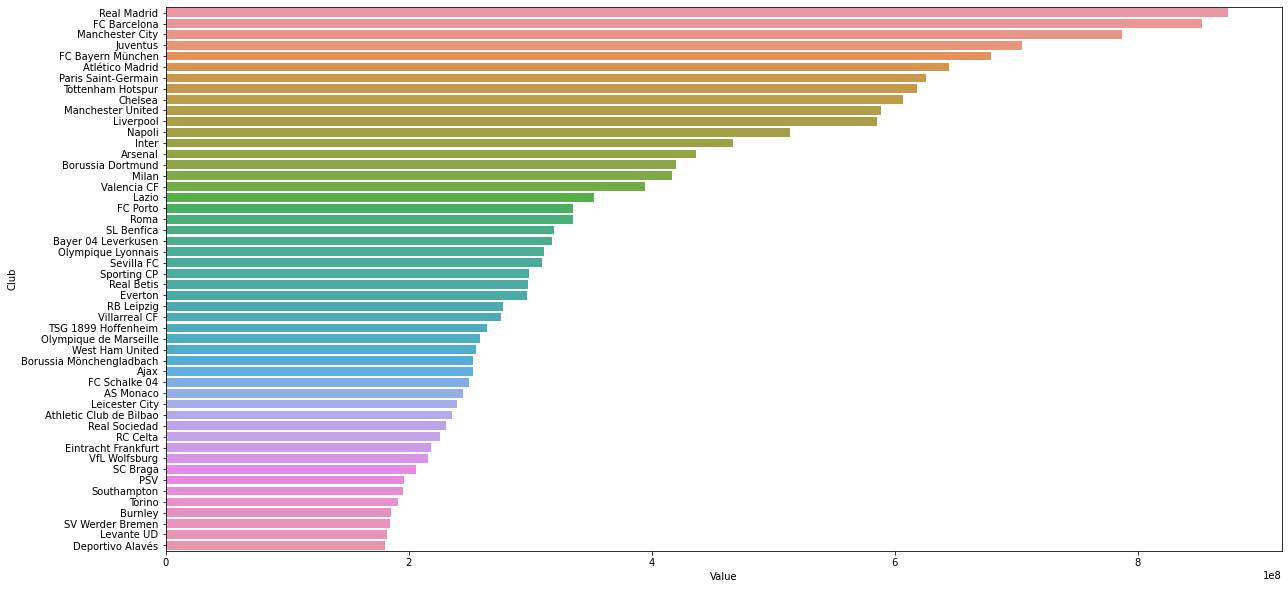

In [57]:
group = df1.groupby('Club')['Value'].sum().reset_index().sort_values('Value', ascending = False).head(50)
plt.figure(figsize = (20,10))
sns.barplot(x = 'Value', y = 'Club', data = group)

In [58]:
group.head(10)

,Club,Value
470,Real Madrid,874425000.0
212,FC Barcelona,852600000.0
374,Manchester City,786555000.0
326,Juventus,704475000.0
214,FC Bayern München,679025000.0
61,Atlético Madrid,644525000.0
435,Paris Saint-Germain,625325000.0
583,Tottenham Hotspur,618450000.0
134,Chelsea,606815000.0
375,Manchester United,588850000.0


In [45]:
group = df.groupby(['Club'])[['Value']]
cmed= group.sum().sort_values(by=['Value'], ascending = False)

In [46]:
cmed.describe()

,Value
count,6.510000e+02
mean,6.739559e+07
std,1.092558e+08
min,1.930000e+06
25%,1.527750e+07
50%,3.052000e+07
75%,6.574250e+07
max,8.744250e+08


In [ ]:
club1=list(cmed.query('Value>=65745200').index)
club1
club2=list(cmed.query('Value>=30520000 & Value<65745200').index)
club2
club3=list(cmed.query('Value>=15277500 & Value <30520000').index)
club4=list(cmed.query('Value<15277500').index)
df1.insert(7,'Club_Value',
            df1.apply(lambda x: 
            3 if x['Club'] in club1
            else 2 if x['Club'] in club2
            else 1 if x['Club'] in  club3
            else 0, axis =1))

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [48]:
# log 값 변환 시 log1p()를 이용해 RMSLE 계산
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle
# mean_square_error(평균 제곱 오차)를 이용해 RMSE계산
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# MSE, RMSE, RMSLE를 모두 계산
def evalute_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE: {0:.3f}, RMSE:{1:.3f}, MAE:{2:.3f}'.format(rmsle_val, rmse_val, mae_val))

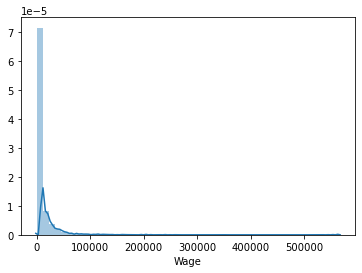

In [50]:
sns.distplot(df1['Wage'])

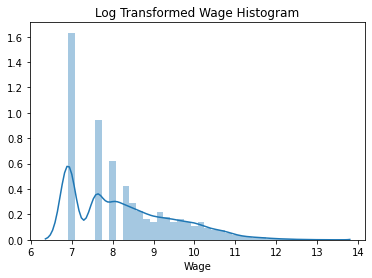

In [51]:
plt.title('Log Transformed Wage Histogram')
log_Wage=np.log1p(df1['Wage'])
sns.distplot(log_Wage)